In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer

In [2]:
data = pd.read_csv('data/winequality-red.csv', sep=';')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


-------------------------------

In [6]:
X = data.drop(columns='alcohol')
y = np.sqrt(data['alcohol'])

In [7]:
esc = PowerTransformer()
esc.fit(X)
X_esc = esc.transform(X)

In [8]:
X = X_esc

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    test_size=.2,
                                                    random_state=69
)

In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [11]:
print('RMSE:', root_mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

RMSE: 0.10054410086808381
R2: 0.622961321672328
MAPE: 0.02387637108143456


------------------------

In [6]:
data['total acidity'] = data['fixed acidity'] + data['volatile acidity']

In [7]:
data.insert(2, 'total acidity', data.pop('total acidity'))

In [8]:
data['sugar density ratio'] = data['residual sugar'] / data['density']

In [9]:
data.insert(4, 'sugar density ratio', data.pop('sugar density ratio'))

In [10]:
data['sulfur dioxide ratio'] = data['free sulfur dioxide'] / data['total sulfur dioxide']

In [11]:
data.insert(9, 'sulfur dioxide ratio', data.pop('sulfur dioxide ratio'))

In [12]:
data['alcohol density ratio'] = data['alcohol'] / data['density']

In [13]:
data.insert(13, 'alcohol density ratio', data.pop('alcohol density ratio'))

In [14]:
data['total_citric_acidity'] = data['total acidity'] + data['citric acid']

In [15]:
data['acidity_pH_ratio'] = data['total_citric_acidity'] / data['pH']

In [16]:
data = data.drop(columns=['fixed acidity','volatile acidity', 'residual sugar','density','free sulfur dioxide', 'total sulfur dioxide', 'alcohol', 'citric acid', 'total acidity', 'total_citric_acidity', 'pH'])

In [17]:
data

,sugar density ratio,chlorides,sulfur dioxide ratio,sulphates,alcohol density ratio,quality,acidity_pH_ratio
0,1.904189,0.076,0.323529,0.56,9.420726,5,2.307692
1,2.608347,0.098,0.373134,0.68,9.831461,5,2.712500
2,2.306921,0.092,0.277778,0.65,9.829488,5,2.638037
3,1.903808,0.075,0.283333,0.58,9.819639,6,3.810127
4,1.904189,0.076,0.323529,0.56,9.420726,5,2.307692
...,...,...,...,...,...,...,...
1594,2.010252,0.090,0.727273,0.58,10.553825,5,1.994203
1595,2.210789,0.062,0.764706,0.76,11.254924,6,1.860795
1596,2.309840,0.076,0.725000,0.75,11.047060,6,2.029240
1597,2.009101,0.075,0.727273,0.71,10.246416,5,1.866947


In [33]:
from sklearn.preprocessing import StandardScaler


# 1. Data Preparation
X = data.drop(columns='quality') # Features
y = data['quality'] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Model Training
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 3. Model Evaluation
y_pred = model.predict(X_test_scaled)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
rmse = np.sqrt(root_mean_squared_error(y_test, y_pred))

print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred)}")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred)}")
# print(f"MAPE: {mape:.2f}%")
# print(f"RMSE: {rmse:.2f}")

MAPE: 0.09467066268613547
RMSE: 0.6593304991487249


In [55]:
data.keys()

Index(['sugar density ratio', 'chlorides', 'sulfur dioxide ratio', 'sulphates',
       'alcohol density ratio', 'quality', 'acidity_pH_ratio'],
      dtype='object')

In [18]:
sns.heatmap(np.where(np.abs(data.corr(numeric_only=True)) > .5, data.corr(numeric_only=True),0), annot=True)

NameError: name 'sns' is not defined

In [38]:
X = data.drop(columns=['sulphates', 'quality'])
y = data['sulphates']

<Axes: ylabel='Frequency'>

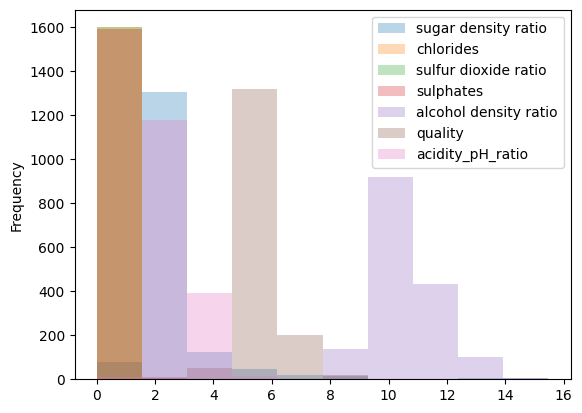

In [39]:
data.plot(kind='hist', alpha=.3)

In [12]:
# sns.pairplot(data)

<Axes: ylabel='Frequency'>

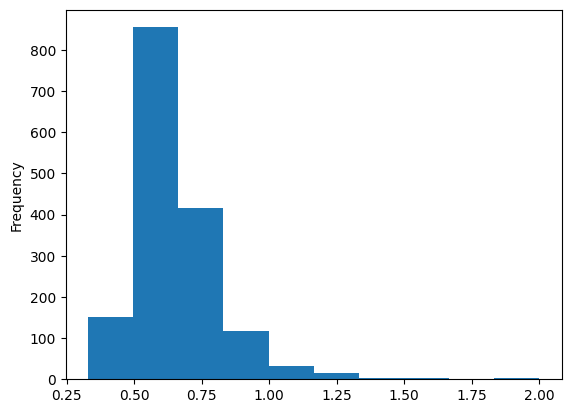

In [40]:
y.plot(kind='hist')

elegir nueva columna como target, una que sea continua, cambiar columna target de quality para alcohol

In [14]:
# X = data.drop(columns='alcohol')
# y = data['alcohol']

<Axes: ylabel='Frequency'>

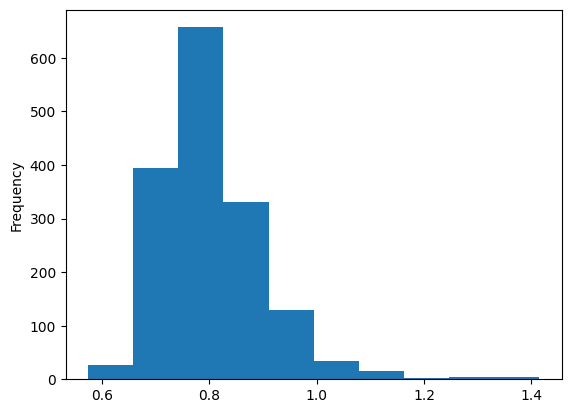

In [41]:
np.sqrt(y).plot(kind='hist')

<Axes: ylabel='Frequency'>

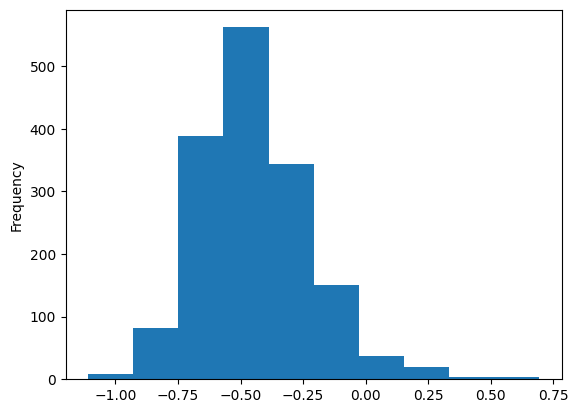

In [42]:
np.log(y).plot(kind='hist')

In [67]:
y.describe()

count       1599
unique         3
top       Medium
freq         837
Name: quality category, dtype: object

In [32]:
np.log(y).describe()

count    1599.000000
mean        0.853492
std         0.356658
min        -0.095381
25%         0.645059
50%         0.791462
75%         0.957458
max         2.738243
Name: sugar density ratio, dtype: float64

In [33]:
np.sqrt(y).describe()

count    1599.000000
mean        1.559819
std         0.336432
min         0.953429
25%         1.380616
50%         1.485470
75%         1.614022
max         3.931896
Name: sugar density ratio, dtype: float64

moda y mediana casi iguales, distribucion casi normal

In [20]:
# y = np.sqrt(data['density'])

In [43]:
X_train, X_test, y_train, y_test = train_test_split (
                                                    X,
                                                    y,
                                                    test_size=.2,
                                                    random_state=69
)

In [44]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('RMSE:', root_mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

RMSE: 0.16661371290188018
R2: 0.21284287017674008
MAPE: 0.1605583292043841


Utilizando la columna ``density`` como target se encontrarón los valores más bajos de RMSE y MAPE, lo que sugiere que el modelo funciona bien en la predicción de la densidad.  
Para explicar esta conclusión se puede decir que la densidad, como propriedad física está influenciada por la composición quimica del vino:  
* El azúcar aumenta la densidad del vino y está directamente relacionado con la calidad del vino, el exceso de azúcar puede afectar negativamente a la calidad del vino.  
* Cuanto más alcohol hay, menos denso es el vino. Normalmente un alto teor de alcohol está relacionado a una buena calidad del vino.

In [45]:
lr.coef_

array([-0.0047566 ,  1.33911453,  0.02746139,  0.027731  ,  0.04366278])

In [46]:
lr.intercept_

np.float64(0.1277960594016354)

COMO LO HIZO JAVIER

sumar las de acidez para obtener acidez total y correlacionar alcohol con azucar porque tienen relacion

sugar density ratio = residual sugar / density

total acidity = fixed acidity + volatile acidity

sugar acid ratio = residual sugar / total acidity

In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

esc = StandardScaler()

esc.fit(X)

X_esc = esc.transform(X)

In [28]:
X_esc

array([[-0.52835961,  0.96187667, -1.39147228, ..., -0.57920652,
        -0.96024611, -0.78782264],
       [-0.29854743,  1.96744245, -1.39147228, ...,  0.1289504 ,
        -0.58477711, -0.78782264],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.04808883,
        -0.58477711, -0.78782264],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.54204194,
         0.54162988,  0.45084835],
       [-1.39015528,  0.65462046, -0.77526673, ...,  0.30598963,
        -0.20930812, -0.78782264],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.01092425,
         0.54162988,  0.45084835]])

# Crear clase para regresión lineal

In [55]:
class LinearRegressionBootcamp:
    def __init__(self,normalized=False):
        self.coefficients = None
        self.interceptor = None
        self.media = None
        self.stddev = None
        self.normalized = normalized

    def normalizado_features(self, X:pd.DataFrame):
        if self.media is None or self.stddev is None:    
            self.media = X.mean(axis=0)
            self.stddev = X.std(axis=0)

        return (X - self.media) / self.stddev
    
    def fit(self, df:pd.DataFrame, target:str):
        X = df.drop(columns=target)
        self.features_columns = X.columns
        y = df[target].values

        if self.normalized:
            X = self.normalizado_features(X)

        X = np.c_[np.ones(X.shape[0]), X]

        theta = np.linalg.solve(X.T @ X, X.T @ y)

        self.interceptor = theta[0]
        self.coefficients = theta[1:]
    

    def predict(self, df:pd.DataFrame):

        if self.coefficients is None or self.interceptor is None:
            raise ValueError('El modelo no ha sido entrenado.')

        X = df[self.features_columns].copy()

        if self.normalized:
            X = (X - self.media) / self.stddev

        y_pred = self.interceptor + np.dot(X, self.coefficients)

        return y_pred

In [52]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [56]:
my_model = LinearRegressionBootcamp(normalized=True)

In [57]:

my_model.fit(data, 'alcohol')

print('Interceptor:', my_model.interceptor)
print('Coeficientes:', my_model.coefficients)

y_pred = my_model.predict(data)

print('RMSE:', root_mean_squared_error(data['alcohol'], y_pred))
print('R2:', r2_score(data['alcohol'], y_pred))
print('MAPE:', mean_absolute_percentage_error(data['alcohol'], y_pred))


Interceptor: 10.422983114446494
Coeficientes: [ 0.85745535  0.10552457  0.15968768  0.36993179 -0.04390991 -0.03157529
 -0.04573902 -1.08263909  0.55842251  0.1617152   0.18753436]
RMSE: 0.5919529738606677
R2: 0.6912531089251452
MAPE: 0.043295300438974574
